In [1]:
import sys
import os

repository_root_directory = os.path.dirname(os.getcwd())
rrd = "repository_root_directory:\t"
print(rrd, repository_root_directory)

if repository_root_directory not in sys.path:
    sys.path.append(repository_root_directory)
    print(rrd, "added to path")
else:  
    print(rrd, "already in path")

from features_extractor import FeaturesExtractor
import numpy as np


preprocessed_dataset = "../_02_data_preprocessed"
extractor = FeaturesExtractor()
data = extractor.extract_features_all_files(preprocessed_dataset)
features = np.array(data['features'])
#labels = np.array(data['labels'])
print("Shape of the deata", features.shape)
print("Number of features: ",features.shape[1])
print("Number of datapoints: ", features.shape[0])

repository_root_directory:	 /home/richard/Documents/csc_461_test/csc_461_fp-main
repository_root_directory:	 added to path
Shape of the deata (1000, 30)
Number of features:  30
Number of datapoints:  1000


In [11]:
#apply kmeans to the data

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering. There will be 10 clusters and it will run 100 times with different sets of randomly initialized centroids (n_init=100) and pick the best run
kmeans = KMeans(n_clusters=10, init='random', n_init=100)
#Fit will calculate the centroid locations. Also using predict because it will assign the datapoints to the specific centroids that it found.
prediction = kmeans.fit_predict(features_scaled)



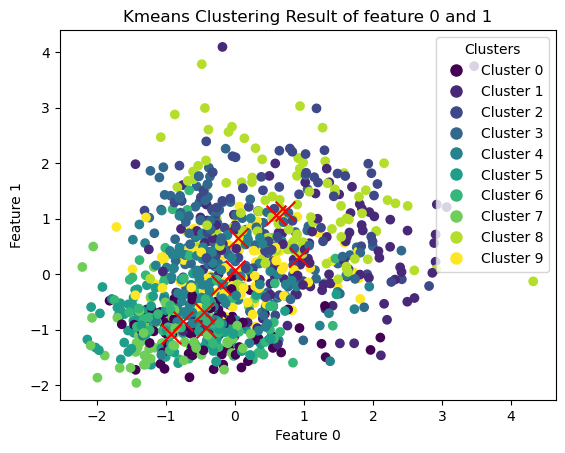

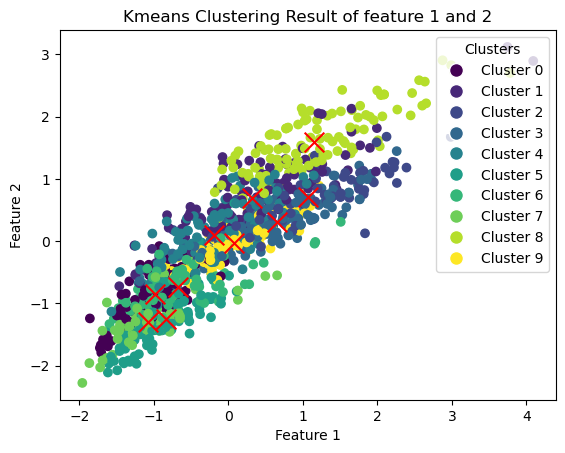

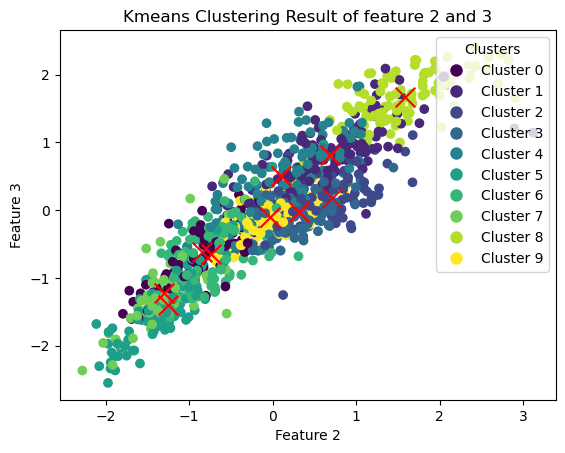

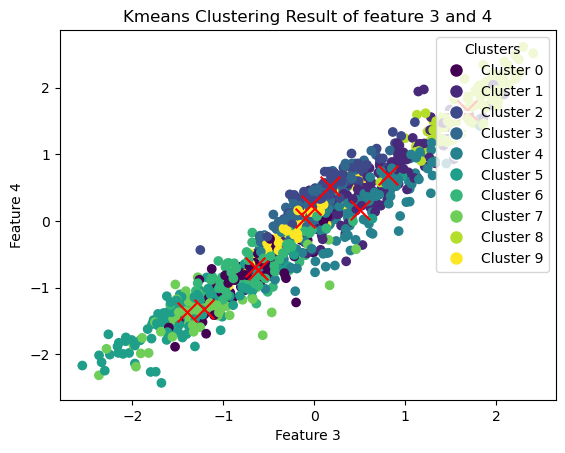

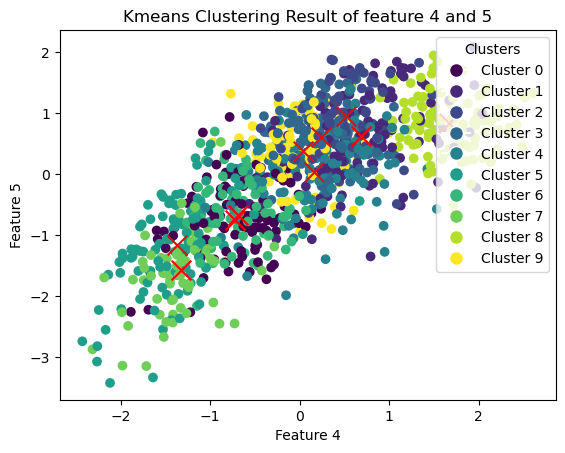

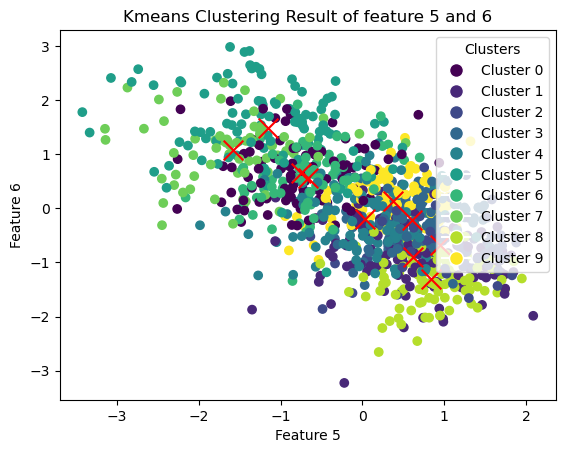

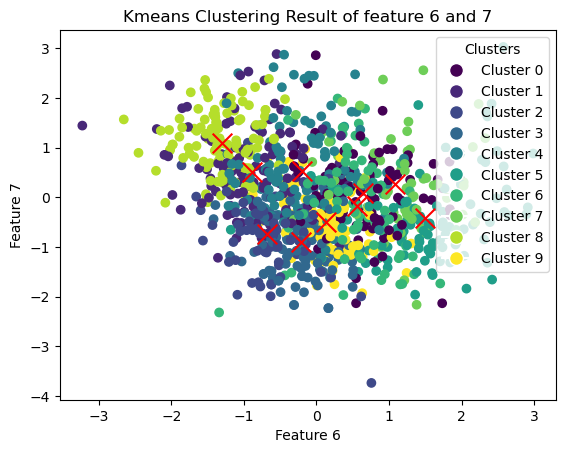

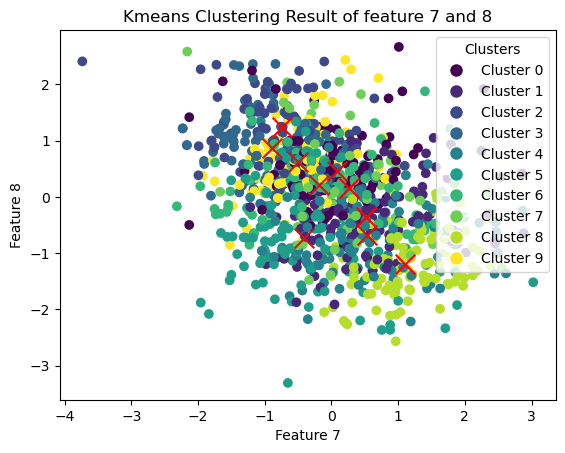

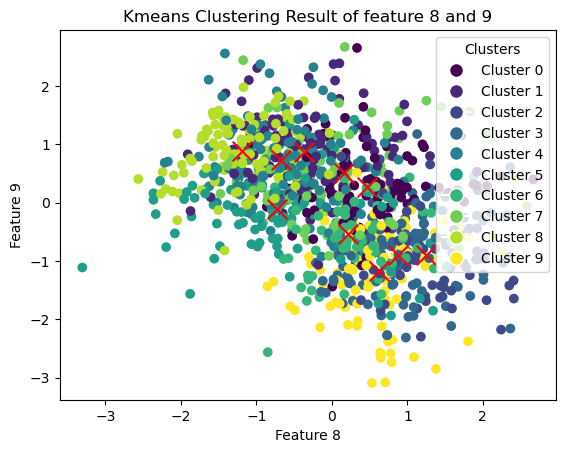

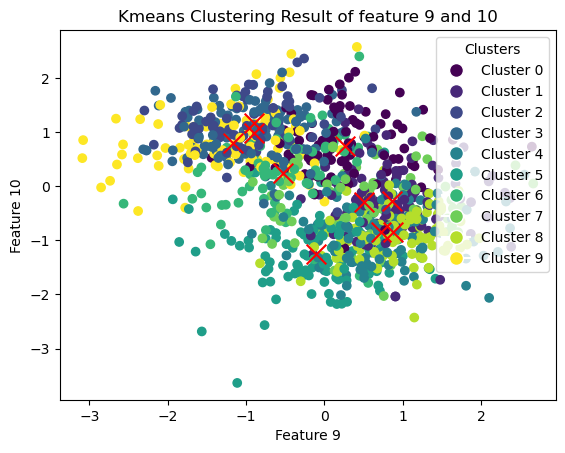

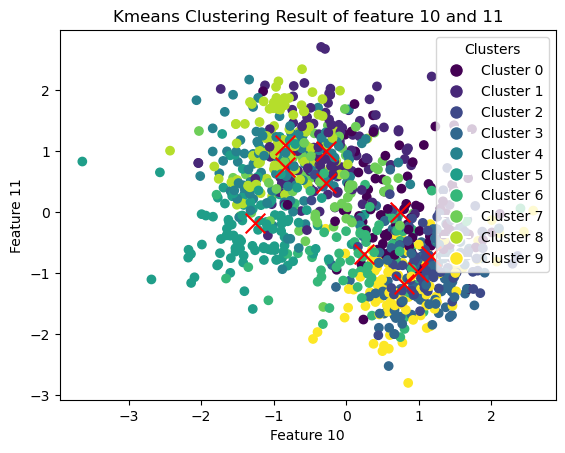

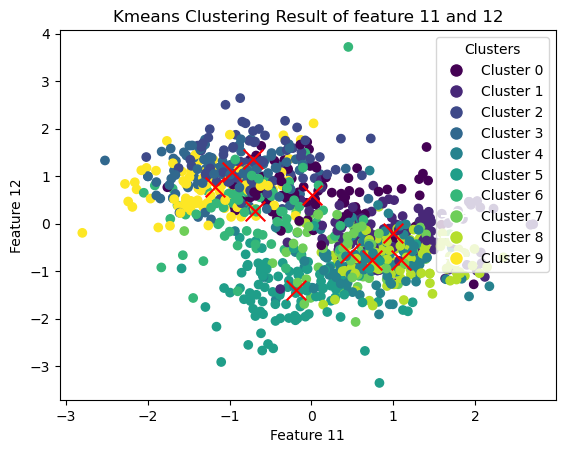

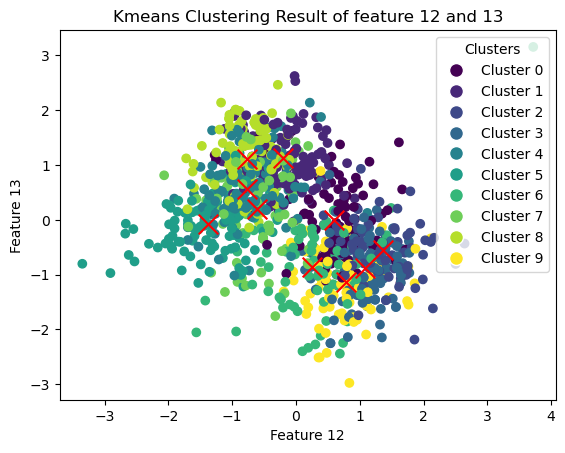

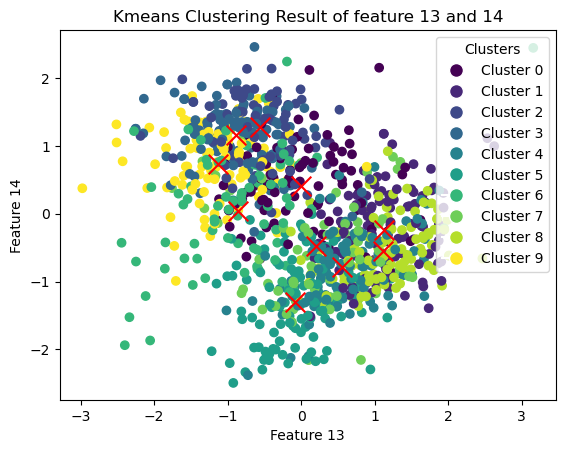

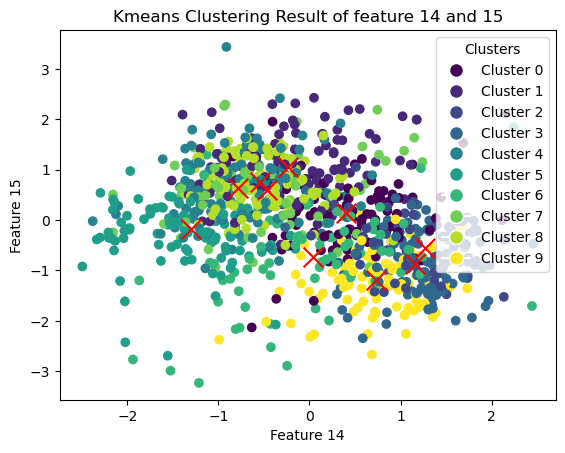

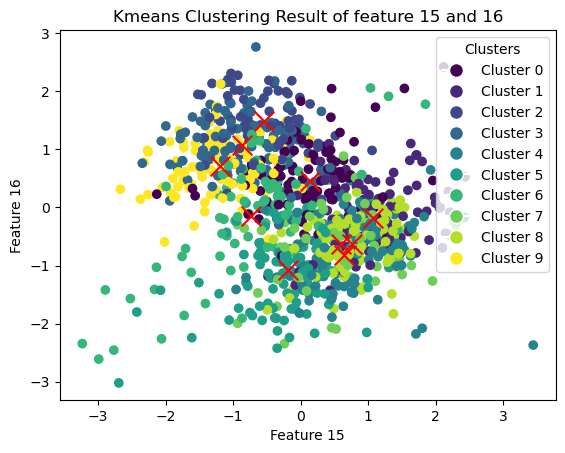

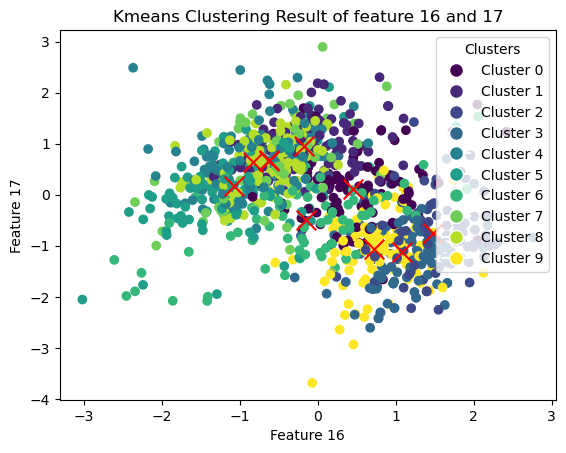

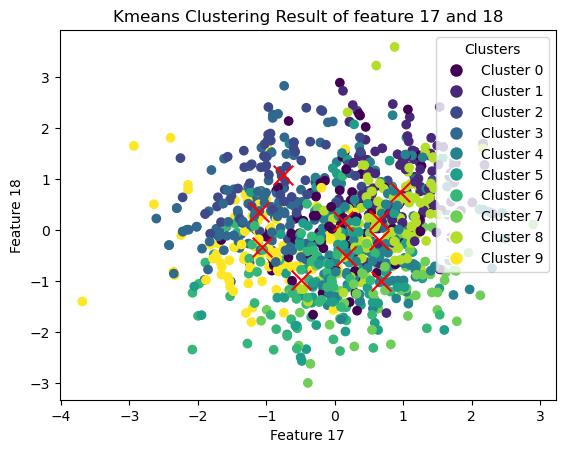

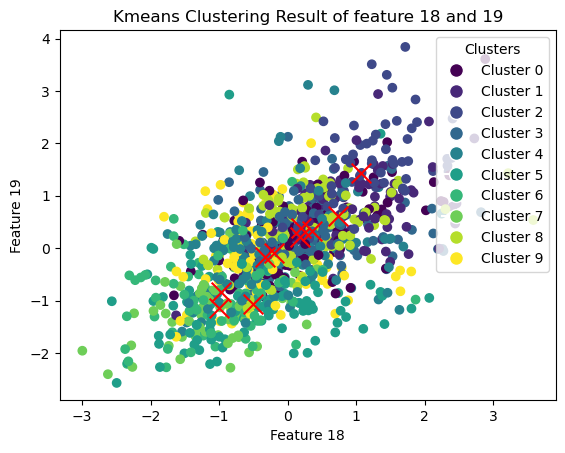

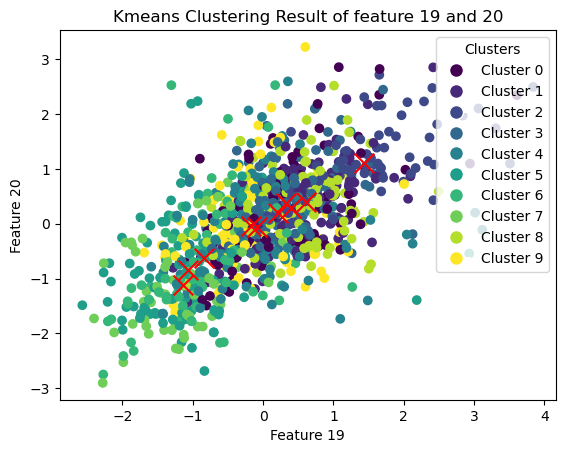

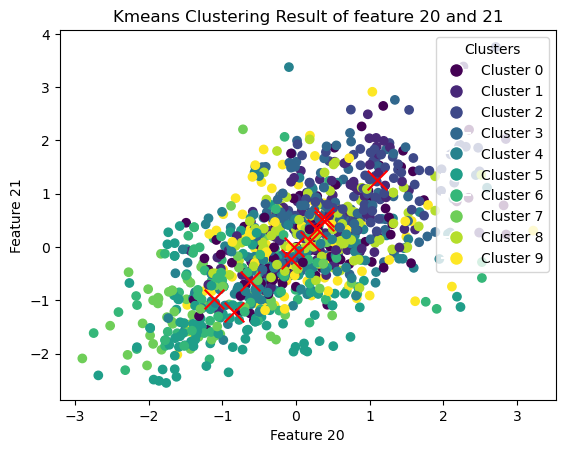

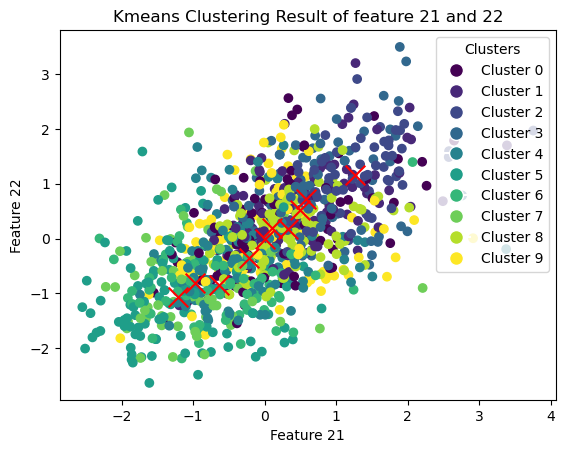

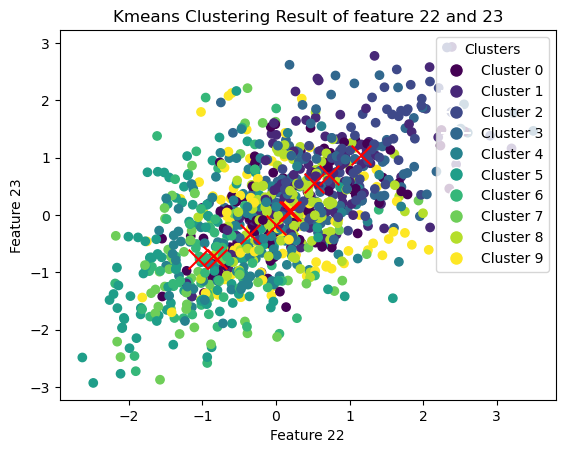

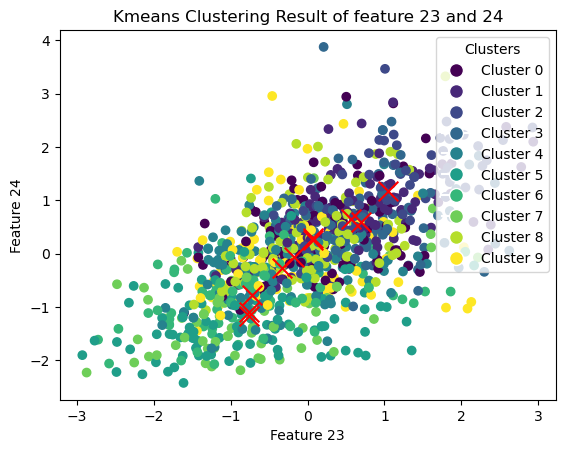

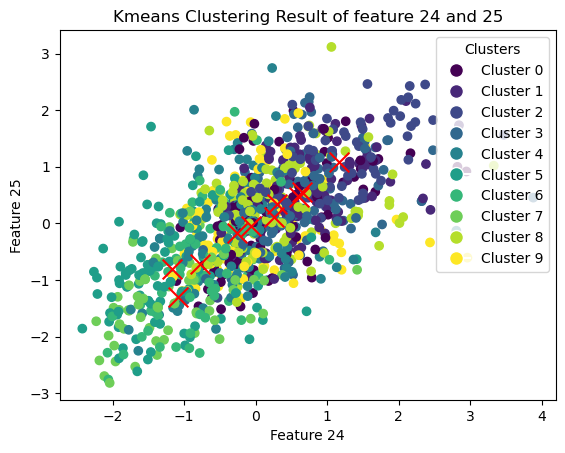

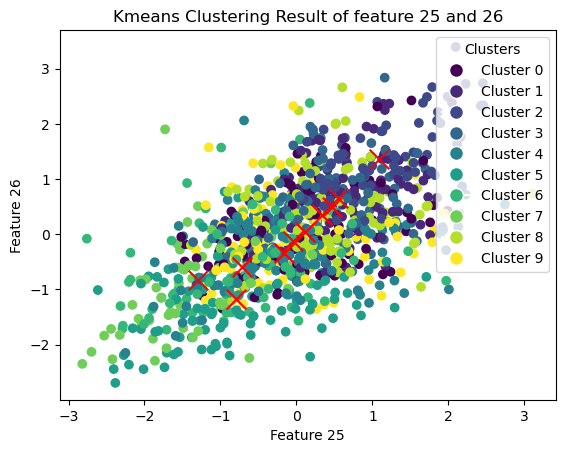

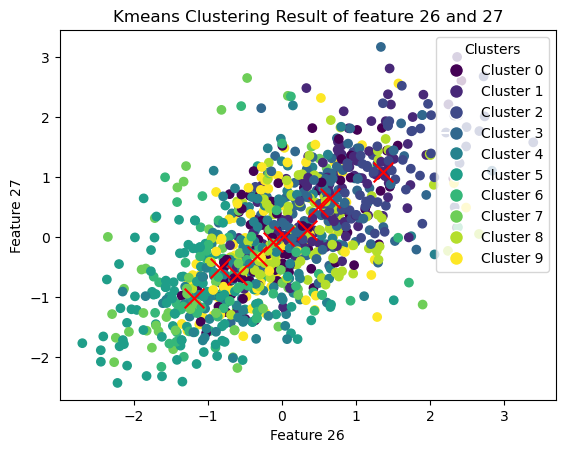

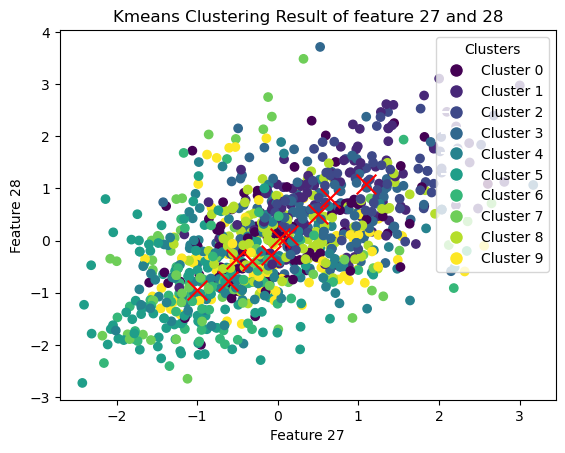

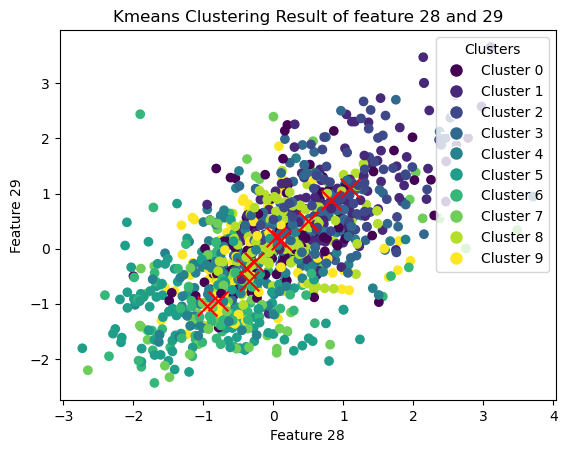

In [ ]:
#analyze the clustering by producing scatter plots

import matplotlib.pyplot as plt

#display all 30 scatter plots of all the dimensions.
for i in range(29):
    #get the cluster centers
    found_cluster_centers = kmeans.cluster_centers_

    plt.title(f"Kmeans Clustering Result of feature {i} and {i+1}")
    scatter = plt.scatter(features_scaled[:,i], features_scaled[:,i+1], c=prediction)
    #plot the cluster centroid locations on the plot as a red x
    plt.scatter(found_cluster_centers[:, i], found_cluster_centers[:, i+1], c='red', marker='x', s=200, label='Centers')

    # Add a legend to the plot.
    #get the cluster labels
    legend_labels = [f'Cluster {i}' for i in range(10)]
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(10)]
    #place the legend in the plot
    plt.legend(handles, legend_labels, title='Clusters', loc='upper right')

    #set the axis labels
    plt.xlabel(f'Feature {i}')
    plt.ylabel(f'Feature {i+1}')
    #make sure all the elements fit correctly
    plt.tight_layout
    plt.show()

In [34]:
#apply PCA to the dataset. We will reduce from 30 dimensions to 2 dimensions 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

print("Shape of features_pca", features_pca.shape)

#reduce the centroids
centroids_pca = pca.transform(found_cluster_centers)

Shape of features_pca (1000, 2)


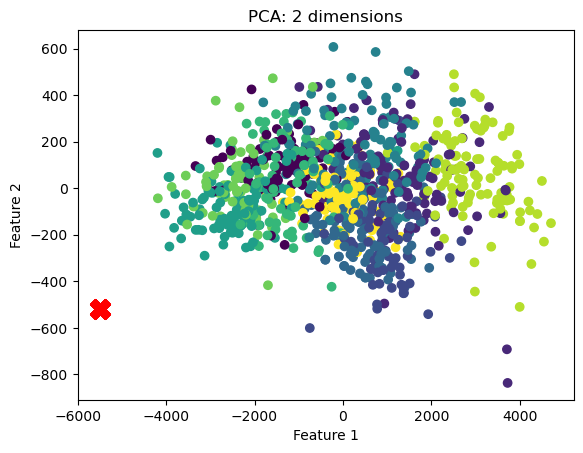

In [35]:
#Plot the scatter plot of PCA

#get the cluster label for each datapoint. This will color in the datapoints according to the cluster found
found_labels = kmeans.labels_

plt.scatter(features_pca[:, 0], features_pca[:, 1], c=found_labels)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("PCA: 2 dimensions")
#set the axis labels
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()